<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2020)</h3>
    <hr>
    <h1>Lab 3: Optimization</h1>
    <h3>October 7, 2020</h3>
</center>




# Introduction
In this lab, we will be using optimization to solve several decision-making problems. The two main problem classes we will work with are knapsack problems and portfolio optimization problems. Both problems are widely applicable. Knapsack problems are linear and integer programming problems, whereas portfolio optimization is a quadratic programming problem.



## Optimization
Optimization, as it is studied within the field of operations research (OR), is an example of prescriptive analytics. Instead of making predictions, you are prescribing a best course of action for a given decision-making problem. 

An optimization problem is described by a vector $\bf{x}$ modeling decision variables, an objective function $f(\bf{x})$ to optimize, and a feasible set $\mathcal{X}$ for which $\bf{x}$ must belong to, i.e., $\bf{x} \in \mathcal{X}$. The optimization problem is a linear program (LP) when $\bf{x}$ is made up of continuous variables, $\mathcal{X}$ is made up of linear constraints, and the objective function is linear in $\bf{x}$, i.e., $f(\bf{x}) = \bf{c}^\top \bf{x}$. The problem is an interger program (IP) if $\bf{x}$ includes integer variables. Finally, the problem is a quadratic program (QP) if the objective function $f(\bf{x})$ is quadratic in $\bf{x}$, i.e., $f(\bf{x}) = \bf{x}^\top\bf{Q} \bf{x}$ (where $\bf{Q}$ is a real symmetric matrix), the optimization problem is a quadratic programming (QP) problem.

LPs are easy to solve, and can be solved in polynomial time. On the other hand, IPs are generally difficult to solve, and are $\mathcal{NP}$-hard problems. QPs are somewhere in between, some are easy to solve and some are hard to solve. You have already been solving QPs in this course! The least squares method (from linear and logistic regression) is a QP, since you are minimizing the *squared* residual errors.


To begin this lab, let us first import the essential tools. We will be using a solver called CVXPY to solve all our optimization problems. If you would like more practice, or would like to see how cvxpy can be used to solve more complicated optimization problems than those presented in this lab, please visit the [website](https://www.cvxpy.org/) where there are lots of resources and example codes. There are many other open-source solvers and packages available (e.g., [OR-Tools](https://developers.google.com/optimization/introduction/overview), [PuLP](https://coin-or.github.io/pulp/)) that are more powerful than CVXPY, however, CVXPY has more friendly syntax. 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxpy as cp

# Extra packages for scraping data (details not covered in course)
import datetime  
import bs4 as bs
import pandas_datareader as web  
import requests

# Knapsack Problems

The first problem we will study is called the Knapsack Problem. The general idea is as follows. You have a knapsack with some capacity and you want to put a set of items into it. You generally cannot fit all of the items into the knapsack, so you have to decide which items to pick. Each item has a weight and a value, and you want to find the subset of items of maximum total value such that its total weight does not exceed the capacity. The knapsack problem is an integer programming problem because the variables take on binary values; you either pick an item or you don't. Mathematically, the knapsack problem is as follows:


\begin{align*}
        \max_{\bf{x}} \quad    & \sum_{j=1}^n v_j x_j \\
        s.t. \quad           & \sum_{j=1}^n w_{j} x_j \leq C \\
		\quad & x_j \in \{0,1\},  \quad \forall j \in \{1,\dots,n\}.
\end{align*}

In the above formulation $v_j$ represents the value of item $j$, $x_j$ is our decision variable representing whether or not we put item $j$ in the knapsack, $w_j$ is the weight of item $j$, and $C$ is the capacity of our knapsack. The first constraint ensures the total weight of our items does not exceed the knapsack, and it is called a *knapsack constraint*. 

In certain problems, we may want to consider *fractional knapsack problems*, which is simply the formulation above without the integrality constraints, i.e., the vector $\bf{x}$ is continuous and can include any values between 0 and 1. The fractional knapsack problem is an LP, whereas the general knapsack problem is an IP. 



##Application

Many problems can be formulated as knapsack problems. Below we present an application of building an itinerary.

Katie is visiting Toronto. She has 8 hours to explore the city and wants to make the most use of her time. She has marked a total of 10 places/attractions that she would like to visit in her guidebook. Furthermore, the guidebook provides a suggestion for the amount of time to spend at each attaction. For any place she visits, Katie plans to spend the amount of time suggested by the guidebook. She prefers some attractions more than others. Suppose her preference for each attraction is described using a **utility** score between 0-1. 

We use the following dictionary to define the 10 sites, their scores and the estimated time that Katie should spend at each site. 


In [ ]:
# Initialize dictionary of scores
K_dict = {'CN Tower': [0.8, 2], 'ROM': [0.43,3], 'AGO': [ 0.56, 2.5], 'UofT': [0.46,1.5], 'K. Market': [0.4,1],
          'Casa Loma': [0.6, 1.5], 'Ripleys': [0.75,2.5], 'High Park': [0.68, 2], 'NP Square': [0.42, 1], 'Island': [0.71,2.5]}
          
# Convert ditionary to DataFrame
df = pd.DataFrame(K_dict, index = ['utility', 'time'])
df.head()

,CN Tower,ROM,AGO,UofT,K. Market,Casa Loma,Ripleys,High Park,NP Square,Island
utility,0.8,0.43,0.56,0.46,0.4,0.6,0.75,0.68,0.42,0.71
time,2.0,3.00,2.50,1.50,1.0,1.5,2.50,2.00,1.00,2.50


### Exercises


1. Suppose Katie started adding destinations to her itinerary in a greedy manner, which means she begins by adding the location giving her the highest utility, followed by the location with the second highest utility and so on, until she can't fit anymore destinations into her itinerary. 

  - 1a. What would her *greedy-optimal* itinerary look like? 

  - 1b. How much total utility would it give her?

  - 1c. Does she have any free time?

  - 1d. While you can compute this solution by hand, can you write code (hint: use a for/while loop) to compute this greedy solution?


2. Do you think this is a good approach to constructing an itinerary? Why or why not?

### Answers

1a.  ['CN Tower', 'Ripleys', 'Island', 'NP Square']

1b. This itinerary gives her a total utility of: 2.68

1c. No


In [ ]:
# 1d. Write your code here

# Example of one approach

df_remaining = df.loc['utility'].copy() 
remaining_cap = 8
itinerary = []
for i in range(len(df.loc['utility'])):
  if (remaining_cap - df[df_remaining.idxmax()].loc['time']) >= 0:
    remaining_cap -= df[df_remaining.idxmax()].loc['time']
    itinerary.append(df_remaining.idxmax())
  df_remaining.drop(df_remaining.idxmax(), inplace = True)

total_util = sum([df.loc['utility', s] for s in itinerary])


print('When constructed in a greedy fashion, Katie\'s itinerary is: \n {}.'.format(itinerary))
print('This itinerary gives her a total utility of: {}.'.format(total_util))
print('She has a total of {} hour(s) that did not get used.'.format(remaining_cap))

When constructed in a greedy fashion, Katie's itinerary is: 
 ['CN Tower', 'Ripleys', 'Island', 'NP Square'].
This itinerary gives her a total utility of: 2.6799999999999997.
She has a total of 0.0 hour(s) that did not get used.


2. No, this is not a good approach because we don't consider the time (weight) of each location when adding it to the itinerary. An attraction Z might give high utility but take a significant amount of time. Other attractions could give slightly less utility but take much less time. We could piece together many different attractions that take less time and make an itinerary that gives much higher total utility than that of location Z. 

## Coding the optimization model

We will define a knapsack problem according to the problem description above and use `cvxpy` to formulate and solve this problem. We'll start with the variables. To define a variable or a set of variables, we use the function `cp.Variable()`. If you input a number, the function will create a *set* of variables as shown below.  By default a variable is continuous, but you can use the parameters (`boolean = True`) or (`integer = True`) to create binary or integer variables, respectively.

In [ ]:
num_locations = len(df.columns)   # number of possible sites to visit
x = cp.Variable(num_locations,boolean=True)  # x is a vector of binary variables of size num_locations.

Next we'll define the objective function. Because we are maximizing the total utility that Katie wants to get out of her itinerary, we use the function `cp.Maximize()`, where we input the objective function $\sum^n_{i =1} v_i x_i$. 

In [ ]:
utility_values = df.loc['utility']   # utility for each site
obj = cp.Maximize(x*utility_values)   # x*utility_values multiplies the utility of each site with a variable corresponding to the site

Next, we will define the constraints. We begin by initializing an empty list of constraints, within which we can append all of the constraints we want to define. For now, we only consider the single knapsack capacity constraint. 

In [ ]:
cons = [] #initialize constraint list

time_values = df.loc['time']  # cost coefficient for the knapsack constraint
cons.append(x*time_values <= 8)  # keep your total hours less than 8

Finally, we put the model together.

In [ ]:
prob = cp.Problem(obj,cons)

## Solving the model

Now that the variables, objective and constraints are defined we can solve the problem.

In [ ]:
prob.solve(verbose=False)  # verbose = True allows you to see the solution process
print('The objective value is {}.'.format(obj.value))  # gives you the objective value

The objective value is 2.97.


To extract the values of the variables, you can use the following code. The code is written compactly. Make sure to understand what each piece of the code is doing.

In [ ]:
#Extract the solution of the IP into a dataframe
x_np_array = x.value.astype(int)  # extract the x values as a np array
x_values = pd.Series(x_np_array, index = df.columns)  # convert the np array to a Dataframe
selected = x_values[x_values == 1].index.values  # get assignments

# Print outputs
print(x_values)
print(selected)

CN Tower     1
ROM          0
AGO          0
UofT         0
K. Market    1
Casa Loma    1
Ripleys      1
High Park    0
NP Square    1
Island       0
dtype: int64
['CN Tower' 'K. Market' 'Casa Loma' 'Ripleys' 'NP Square']


## Model Variant

Suppose Katie is traveling with her brother Chris, who would like to see UofT, and also does not want to visit more than 3 locations. The complete code with Chris's conditions is presented below:

In [ ]:
# Define variables
x_2 = cp.Variable(len(df.columns), boolean=True) 
# Define objective
obj_2 = cp.Maximize(x_2*df.loc['utility'])

# Define constraints
cons_2 = []  # Initialize constraint list
cons_2.append(x_2*df.loc['time'] <= 8)  # time constraint
cons_2.append(x_2[list(df.columns).index('UofT')] >= 1)  # must visit UofT constraint
cons_2.append(cp.sum(x_2)<=3)  # must not visit more than 3 locations
prob_2 = cp.Problem(obj_2,cons_2)
prob_2.solve()

2.01

## Exercises


1. Suppose that Katie is traveling alone. If Katie wanted to visit at least one of the two museums (AGO or ROM), what constraint would we add into the model? 

2. Suppose again that Katie is traveling alone. We now consider the case where, for each destination, Katie is willing to spend *less* time that the guidebook suggests. Code up this fractional knapsack problem. Add the subscript _lp to names of variables, objective, constraints and the model, so that your code doesn't overlap with the models defined above. Hint: `x_lp >= 0` and `x_lp <= 1` ensures that all of the variables are between 0 and 1.

 - 2a. What is her total utility?

 - 2b. How did her itinerary change?

 - 2c. What would we have to assume about Katie's utility function for this model to make sense? Hint: if Katie spends 50% of the estimated time at a location, how much utility would she get? 




 3. Consider Katie's original problem, but now suppose that she has only 7.75 free hours. Do you expect the LP relaxation (i.e., the fractional knapsack problem in the previous question) to give lower, the same, or higher total utility? Why?

### Answers

In [ ]:
#Question 1 answer 
# x[list(df.columns).index('AGO')] + x[list(df.columns).index('ROM')] >= 1

In [ ]:
# Question 2 answer
# write code here
# use new variable name for the problem: prob_lp = cp.Problem(obj,cons)

x_lp = cp.Variable(len(df.columns), boolean = False) 
obj_lp = cp.Maximize(x_lp*df.loc['utility'])
cons_lp = []

cons_lp.append(x_lp*df.loc['time'] <= 8) 
cons_lp.append(x_lp >= 0)
cons_lp.append(x_lp <= 1)
prob_lp = cp.Problem(obj_lp,cons_lp)
prob_lp.solve()
print(obj_lp.value)
x_values = pd.Series(np.round(x_lp.value,2), index = df.columns) 
print(x_values)

3.053333333303351
CN Tower     1.00
ROM          0.00
AGO          0.00
UofT         0.33
K. Market    1.00
Casa Loma    1.00
Ripleys      0.00
High Park    1.00
NP Square    1.00
Island       0.00
dtype: float64


 - 2a. Katie gets a total utility score of 3.0533.

- 2b. Katie spends 0.5 hours at UofT and 2 hours at High park, instead of 2.5 hours at Ripleys.

- 2c. For each location, Katie's utility must be a linear function of the time spent at the location. 

3. I expect the fractional knapsack problem to give higher utility. When we are solving the integer programming problem, there will be at least 0.25 hours that cannot be used since all activity/location times are in increments of 0.5 hours. The fractional knapsack will allocate the free time to another location.  

#Portfolio Optimization

In this section, we will study another type of optimization problem, called portfolio optimization. The problem will be presented in the context of stock investing, although it can be applied to other settings (e.g., funding and investing in projects or medical research).

In porfolio optimization, we are given a set of assets, and we are trying to decide on an *portfolio allocation vector* which represents the fraction of our total wealth that we are investing in each asset. Mathematically, suppose there are $n$ different assets, and we have to decide on a vector $\mathbf{x} = [x_1, x_2, \ldots , x_n]$ such that $\sum_{i = 1}^n x_i = 1$ and $x_i \geq 0 \ \forall i \in \{0,1,.\ldots,n\}$. The objective of the portfolio optimization problem is to invest in assets that have high *return* but low *risk*. 



## Model

We define the portfolio optimization problem below.


\begin{array}{ll} \underset{\bf{x}}{\mbox{maximize}} & \boldsymbol{\mu}^T {\bf x} - \gamma {\bf x}^T\Sigma {\bf x}\\
\mbox{subject to} & {\bf 1}^T {\bf x = 1},\\
& \mathbf{x} \geq \mathbf{0}.
\end{array}

The vector of $\boldsymbol{\mu}$ = $[\mu_1, \mu_2, ... \mu_n]$ defines the *expected return* of each stock. That is, given a \$100 dollar investment today in stock $i$ today, we expect to make $\$100\mu_i$ in the next period. Intuitively, we want to maximize our total expected return, represented by $\boldsymbol{\mu}^\top \bf{x}$. 

Secondly, we want to minimize the *risk* of the portfolio. Risk is defined by the variance of the portfolio. The higher the variance, the more likely you are to lose a lot of money. The variance of a portfolio is defined by the variance of each individual stock in your portfolio as well as the co-variance between the stocks in your portfolio. The risk is given by the term ${\bf{x}}^\top \Sigma {\bf{x}}$. Since we want to minimize risk, we use the negative term $-{\bf{x}}^\top \Sigma {\bf{x}}$ in the objective function.

Finally, the value of $\gamma \geq 0$ is the *risk aversion parameter*. This value helps decide how much emphasis we want to put on minimizing risk, which generally comes at a cost of lowering expected return. For example, if we set $\gamma = 0$, then we would be building a portfolio without considering risk at all. We call the objective $\mu^T\mathbf{x} - \gamma \mathbf{x}^T\Sigma \mathbf{x}$ the *risk-adjusted return*. 



## Return and Risk in Detail

In this section, we will elaborate a bit more on the ideas of expected return and risk. While you will not be expected to understand the math in detail, it should serve to give a better idea of portfolio optimization for those who are interested. 

First, we discuss the topic of *expected* return. If we buy a stock at price $p_i$ and sell it at $p^*_i$ in the next period, we will make a return of $r_i = (p^*_i - p_i)/p_i$. At the time of buying stocks, however, we will not know exactly what the return of each stock will be. Nonetheless, we can estimate the *expected return* $\mathbb{E}[r_i]$, which is denoted by $\mu_i$. The first objective of portfolio optimization is to find a portfolio allocation vector $\mathbf{x}$ such that the expected return $\mathbb{E}[\mathbf{R}] = \sum^n_{i = 1} \mu_i x_i$ is maximized. 

The second objective of portfolio optimization is to minimize the *risk* of the portfolio, which is represented by the *variance* of the portfolio $\mathbf{x}^\top \Sigma \mathbf{x}$, where $\Sigma$ represents the covariance matrix. In particular, portfolio optimization assumes that investors are *risk averse*. That is, for the same expected return, investors would prefer a portfolio with very low variance (for example, where the expected return is guaranteed) rather than a portfolio with high variance (there's a chance you lose all your money).

The term $\mathbf{x}^\top \Sigma \mathbf{x}$ might look mysterious or complicated, but it easy to explain (and python packages will take care of the complicated operations :)). If we write out $\mathbf{x}^\top \Sigma \mathbf{x}$, we get $\sum _{i}x_{i}^{2}\sigma _{i}^{2}+\sum _{i}\sum _{j\neq i}x_{i}x_{j}\sigma _{i}\sigma _{j}\rho _{ij}$, where $\sigma_i$ is the standard deviation of a stock $i$ and $\rho_{ij}$ is the correlation coefficient between stock $i$ and $j$. The first term ($\sum _{i}x_{i}^{2}\sigma _{i}^{2}$) captures the *variance* of each stock, i.e., how volatile stock $i$ is. The second term ($\sum _{i}\sum _{j\neq i}x_{i}x_{j}\sigma _{i}\sigma _{j}\rho _{ij}$) captures the *co-variance* between stocks, i.e., how closely stock $i$ moves with respect to stock $j$. Naturally, we want to build a portfolio with stocks that have low volatility, as well as a diversified portfolio so that not all stocks follow the same trajectory.


### Exercise

1. Suppose $\bf{x}_1$ and $\bf{x}_2$ corresponds to two portolios built using $\gamma_1$ and $\gamma_2$, respectively. If $\gamma_1 > \gamma_2$, would I expect the variance of the portfolio $\bf{x}_1$ to be higher or lower than $\bf{x}_2$?



### Answer

1. We would expect the variance of portfolio 1 to be lower than that of portfolio 2.

## Getting Data

In this lab, we will assume that $\mu$ and $\Sigma$ is the mean and covariance of the historical returns of assets, respectively. The following code will scrape the ticker symbols (i.e., their abbreviation in the stock market) S&P 500 companies from Wikipedia, and the daily stock prices from Yahoo Finance. We will use daily returns from Sept 1, 2019 to Sept 1, 2020 to calculate our $\mu$ and $\Sigma$. Because these are average daily returns, the numbers will appear quite small. 

Scraping data takes time. To make sure the code can run quickly, we only consider the first 30 companies in the S&P 500 list. The code may take up to a minute to run. 

Finally, note that you **do not** have to understand or reproduce the following code, you will not be tested on it. We included it here simply for your own interest. 


In [ ]:
# import datetime  # Package for making dates
# import bs4 as bs
# import pandas_datareader as web  #
# import requests

# datetime.datetime is a data type within the datetime module
start = datetime.datetime(2019, 9, 1)
end = datetime.datetime(2020, 9, 1)

# Get tickers for S&P 500 stocks
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:30]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker.split('\n')[0])

# Load data from yahoo
df = web.DataReader(tickers, 'yahoo', start, end)
daily_gains = (df.Close - df.Open) / df.Open
# Get close prices
average_return = daily_gains.mean()
covariance = daily_gains.cov()

# Print summary of data
print(average_return.head())  
print(covariance.head())

# Estimate parameters for portfolio optimization model
mu = average_return.values    #convert dataframe to array
Sigma = covariance.values    #convert dataframe to matrix


Symbols
MMM    -0.000419
ABT     0.000469
ABBV    0.000568
ABMD    0.002764
ACN     0.001249
dtype: float64
Symbols       MMM       ABT      ABBV  ...      AMCR       AEE       AAL
Symbols                                ...                              
MMM      0.000334  0.000166  0.000109  ...  0.000170  0.000177  0.000236
ABT      0.000166  0.000386  0.000115  ...  0.000047  0.000209  0.000124
ABBV     0.000109  0.000115  0.000255  ...  0.000105  0.000098 -0.000049
ABMD     0.000133  0.000218  0.000067  ...  0.000098  0.000109  0.000110
ACN      0.000139  0.000163  0.000106  ...  0.000134  0.000146  0.000141

[5 rows x 29 columns]


### Exercises

1. What is the stock with the highest mean return? What is its expected return?

2. What is the stock with the lowest mean return? What is its expected return?

3. Do you observe any negative values in the covariance matrix? What does a negative value mean?

4. Assume that you are already holding a stock (stock A), and have to choose one more stock to invest in. Suppose stock B and C both have the same expected return and variance, but stock B has a higher covariance with A. Which stock (B or C) would you invest in, assuming you are risk-averse?

### Answers

In [ ]:
print('The stock with highest mean return is {} with a return of {}.'.format(average_return.idxmax(), average_return[average_return.idxmax()]))
print('The stock with lowest mean return is {} with a return of {}.'.format(average_return.idxmin(), average_return[average_return.idxmin()]))

The stock with highest mean return is ALB with a return of 0.003027043103356948.
The stock with lowest mean return is AAL with a return of -0.00495631914657829.


3. When two stocks tend to move in opposite directions, i.e., when they move inversely, the covariance is negative. 

4. You would invest in the stock with lower covariance (i.e., stock C) if you are risk-averse.

## Setting up CVXPY model



In this section, we will show you how to code up and solve the portfolio optimization problem in `cvxpy`. The notation is almost identical to the linear and integer programming model, except we require a new function to formulate the quadratic objective function. The code is shown below:

In [ ]:
# import cvxpy as cp

#variable and parameter definitions
x = cp.Variable(len(mu))
gamma = cp.Parameter(nonneg = True)

#objective definition
ret = mu.T*x
risk = cp.quad_form(x, Sigma)
obj = cp.Maximize(ret - gamma*risk)

#constraint definition
cons = []
cons.append(cp.sum(x) == 1)
cons.append(x >= 0)

#formulating the problem
prob = cp.Problem(obj, cons)

To solve the problem for a given gamma, we can simply just set gamma equal to some value and then apply the prob.solve() command. However, as a decision-maker, we may not be sure what the most preferred gamma is. Instead, we can use the code below to compute the *trade-off curve* between return and risk, which plots the return and risk for a large set of gammas. The curve can be interpreted as: for each level of risk (x-axis), the maxmimum return possible is shown (y-axis).  As is often the case in modern portfolio theory, we will plot the standard deviation of a porfolio rather than the variance on the x-axis. Both concepts capture the notion of risk, since the standard deviation is simply the square root of variance. The larger the standard deviation, the larger the variance, and vice versa. 

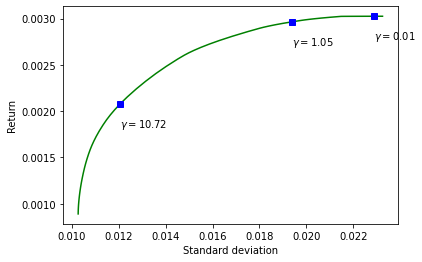

In [ ]:
# Initialize values
SAMPLES = 100   #number of gammas we will use
risk_data = np.zeros(SAMPLES)  #creating list of zeros
ret_data = np.zeros(SAMPLES)  #creating list of zeros
gamma_vals = np.logspace(-2,3, num = SAMPLES)  #creating a list of different gamma values

# Loop through different gamma values/samples
for i in range(SAMPLES):
  gamma.value = gamma_vals[i]
  prob.solve()
  risk_data[i] = cp.sqrt(risk).value  #square root of elements of covariance matrix
  ret_data[i] = ret.value   #expected return of stocks

# Plot the trade-off curve
markers_on = [1,40,60]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker], ret_data[marker]-.00025))
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

## Conceptual Exercises

1. Why does the curve go to the bottom left corner as we increase gamma?

2. If our current (optimally constructed) portfolio has an expected standard deviation of 0.02, and we want to reduce the standard deviation to be 0.012, what is the expected *loss* in returns? A rough approximation is fine, this is just to get you familiar with interpreting the graph. 

3. Why do you think the expected return of the portfolio plateaus at the top right corner? What is the bound on the expected return of a portfolio?

### Answers

1. As we increase gamma, we are putting more emphasis on minimizing the risk (i.e., variance) of the portfolio, and thus the optimal portfolios will increasingly go to the left of the graph. Because there is a trade-off between return and risk, as we decrease risk the expected returns are decreased. 

2. We lose about 0.001 dollars on every dollar invested. 

3. The maximum expected return of the portfolio can only be as high as the maximum expected return of any one stock. This extreme case is where you invest all of your money in a single stock without diversifying. 

## Coding Exercises

Now it's time for you to practice coding! Try coding up the following problem:

1. Suppose we want to build a portfolio where the expected return is at least 0.001. Solve for the portfolio with the lowest possible variance in this setting. 
  - What is the portfolio allocation vector, the expected return, and the variance? 
  - How many stocks are you investing in?

2. Suppose we want to build a portfolio using *only* stocks that have an expected return of at least 0.001. Solve for the portfolio with the lowest possible variance in this setting.    
 - What is the portfolio allocation vector, the expected return, and the variance? 
  - How many stocks are you investing in? 

3. The variance of the first portfolio ($1.061 \times 10^{-4}$) is lower than the second portfolio ($1.264 \times 10^{-4}$). Why do you think that is?

### Answers

1. See below.

2. See below.

3. In the second portfolio, you are constraining which assets you can use to build the portfolio. In particular, the feasible region of the second problem is smaller than that of the first problem, since you are restricting a subset of the asset investments to be zero. As this is a minimization problem, a smaller feasible region results in a larger objective value.

In [ ]:
#First Portfolio Problem
# Hint: you can use np.round() and np.count_nonzero() functions.

#variable and parameter definition
x = cp.Variable(len(mu))
ret = mu.T*x
risk = cp.quad_form(x, Sigma)

#objective definition
obj = cp.Minimize(risk)

#constraint definition
cons = []
cons.append(cp.sum(x) == 1)
cons.append(x >= 0)
cons.append(ret >= 0.001)  #new constraint

#problem definition
prob = cp.Problem(obj, cons)

prob.solve()
print(np.round(x.value,3))
print('We are investing in {} stocks.'.format(np.count_nonzero(np.round(x.value,3))))
print('The expected return of this portfolio is {}'.format(ret.value))
print('The variance of this portfolio is {}'.format(obj.value))

[-0.    -0.     0.162  0.037 -0.     0.076 -0.    -0.    -0.     0.045
  0.047  0.049  0.055  0.028  0.038  0.     0.018 -0.     0.    -0.
  0.032 -0.    -0.    -0.     0.103  0.231  0.081  0.     0.   ]
We are investing in 14 stocks.
The expected return of this portfolio is 0.0009999999999999998
The variance of this portfolio is 0.00010606095905166694


In [ ]:
#Second Portfolio Problem
# Hint: you can use np.round() and np.count_nonzero() functions.

#variable and parameter definitions
x = cp.Variable(len(mu))

#objective definition
ret = mu.T*x
risk = cp.quad_form(x, Sigma)
obj = cp.Minimize(risk)

#constraint definition
cons = []
cons.append(cp.sum(x) == 1)
cons.append(x >= 0)
for index,value in enumerate(mu):   #new set of constraints
  if value <= 0.0009999:
    cons.append(x[index] <= 0)

#formulating the problem
prob = cp.Problem(obj, cons)

#solve the problem 
prob.solve()
print(np.round(x.value,3))
print('We are investing in {} stocks.'.format(np.count_nonzero(np.round(x.value,3))))
print('The expected return of this portfolio is {}'.format(ret.value))
print('The variance of the portfolio is {}'.format(obj.value))

[-0.    -0.     0.     0.039 -0.     0.138  0.    -0.    -0.     0.113
 -0.     0.158  0.093 -0.    -0.     0.035  0.     0.    -0.    -0.
 -0.    -0.     0.022 -0.    -0.     0.264  0.139  0.    -0.   ]
We are investing in 9 stocks.
The expected return of this portfolio is 0.0016281117530571195
The variance of the portfolio is 0.0001264080130435936


# Reflection

In this lab, you learn how to model, code and solve optimization problems. A major assumption of this lab is that the parameters of the optimization problem are known. For example, we assumed that the expected return and covariance matrix of the stocks could be generated using historical estimates. 

In real-world applications, you not only have to solve optimization problems, but you also have the estimate the parameters of your optimization problem. In one of the future labs we will cover a *predict-and-optimize* process, where we use machine learning techniques to predict parameters which we can then feed into an optimization model. This approach combines predictive and prescriptive analytics. 